In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os import system
from os.path import join, basename

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import seaborn as sns
from scipy.stats import norm
import scienceplots

import candel
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )


root = join(config["root_main"], "results", "CF4_H0_anisotropy")
print(f"root: {root}")

root: /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy


In [3]:
!ls /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_noMNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_lo

## Posterior summary

In [6]:
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5"
fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/Vext_PantheonPlus_MNR_Mdip_prior.hdf5"

with File(fname, "r") as f:
    grp = f["samples"]
    print(f"keys: {list(grp.keys())}")

    samples = {key: grp[key][...] for key in grp.keys()}


keys_read = ["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b"]
# keys_read = ['M_dipole_b', 'M_dipole_ell', 'M_dipole_mag']
# keys_read = ['Vext_b', 'Vext_ell', 'Vext_mag']

for key in keys_read:
    low, med, high = np.percentile(samples[key], [16, 50, 84])
    low = med - low
    high = high - med
    print(f"{key}: {med:.3f} +{high:.3f} -{low:.3f}")




keys: ['Vext', 'Vext_b', 'Vext_ell', 'Vext_mag', 'a_TFR', 'a_TFR_dipole_b', 'a_TFR_dipole_ell', 'a_TFR_dipole_mag', 'alpha', 'b_TFR', 'beta', 'c_TFR', 'eta_latent', 'eta_prior_mean', 'eta_prior_std', 'mag_latent', 'sigma_mu', 'sigma_v']
a_TFR_dipole_mag: 0.073 +0.024 -0.026
a_TFR_dipole_ell: 119.243 +19.476 -18.373
a_TFR_dipole_b: 24.780 +12.109 -12.835


In [12]:
which = "BIC"

compare_zeropoint_dipole_gof("/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/Vext_CF4_W1_noMNR_aTFRdipole.hdf5", which)

[DIPOLE]:    53469.33203125
[ISO]:       53462.4609375
[INFO] File last modified: 2025-05-26 11:06:31


6.87109375

## Table 1. Evidence comparison

In [ ]:


for dust_choice in ["", "default", "CSFD"]:
    fname = join(root, "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5")

    if len(dust_choice) > 0:
        fname = fname.replace(".hdf5", f"_dust-{dust_choice}.hdf5")
    print(f"File: {basename(fname)}")
    print(compare_zeropoint_dipole_gof(fname, which))

    # system(f"open {fname.replace('.hdf5', '.png')}")
    print()



File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5
[DIPOLE]:    51135.34765625
[ISO]:       51135.5859375
[INFO] File last modified: 2025-05-23 12:46:49
-0.23828125

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5
[DIPOLE]:    51137.125
[ISO]:       51136.88671875
[INFO] File last modified: 2025-05-23 13:35:32
0.23828125

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5
[DIPOLE]:    51137.36328125
[ISO]:       51136.8125
[INFO] File last modified: 2025-05-23 13:45:41
0.55078125



### Figure 1: Carrick+2015 MNR posterior with a dipole

precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, alpha, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, alpha, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
Removed no burn in
Removed no burn in
2025-05-26 15:15:12 [INFO] Saving GetDist triangle plot to: C15_full_posterior.pdf


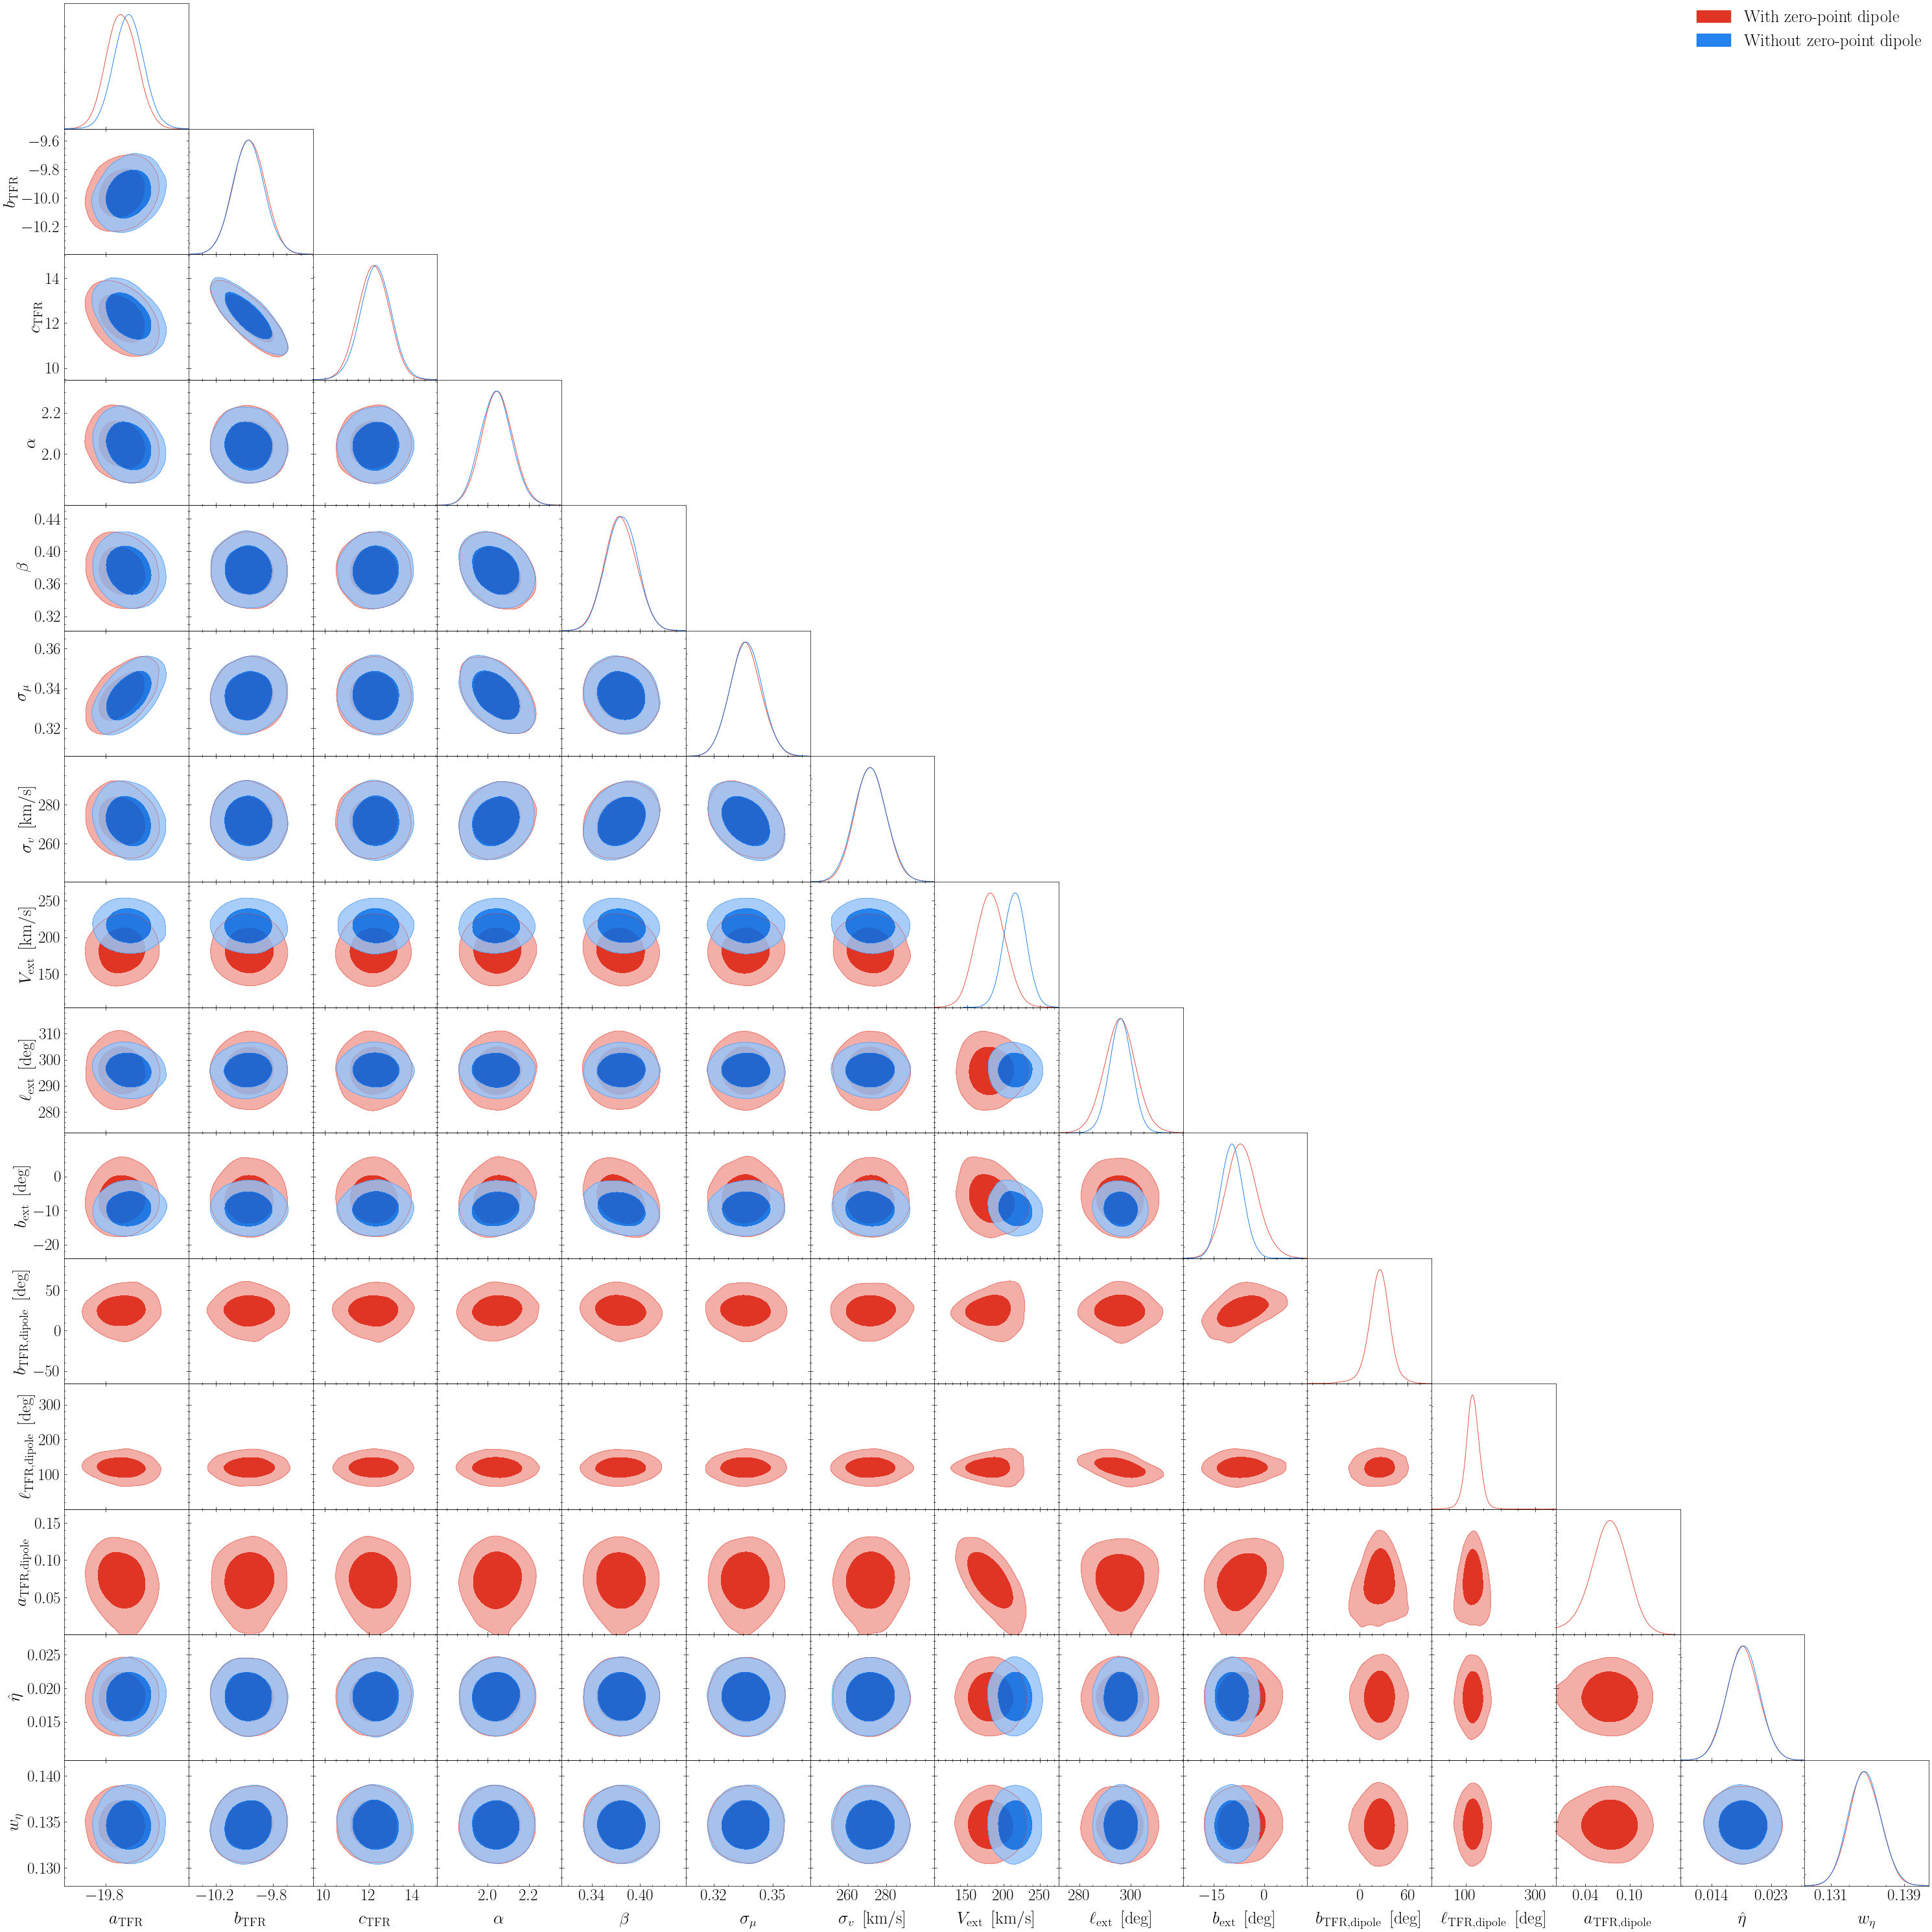

In [7]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=22,
    labels=["With zero-point dipole", "Without zero-point dipole"],
    keys=None,
    filename="C15_full_posterior.pdf",
    )

### Figure 2: Zoom-in on the magnitude dipole

<>:14: SyntaxWarning: invalid escape sequence '\&'
<>:14: SyntaxWarning: invalid escape sequence '\&'
/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_74178/2158273022.py:14: SyntaxWarning: invalid escape sequence '\&'
  "Dipole + dust (Schlafly \& Finkbeiner 2011)",


precomputed_los_Carrick2015_CF4_W1_noMNR.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, alpha, b_TFR, beta, c_TFR, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, alpha, b_TFR, beta, c_TFR, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5: R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, alpha, b_TFR, beta, c_TFR, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5: R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, alpha, b_TFR, beta, c_TFR, sigma_mu, sigma_v
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
2025-05-29 10:02:30 [INFO] Saving GetDist triangle plot to: C15_mag_dipole.pdf


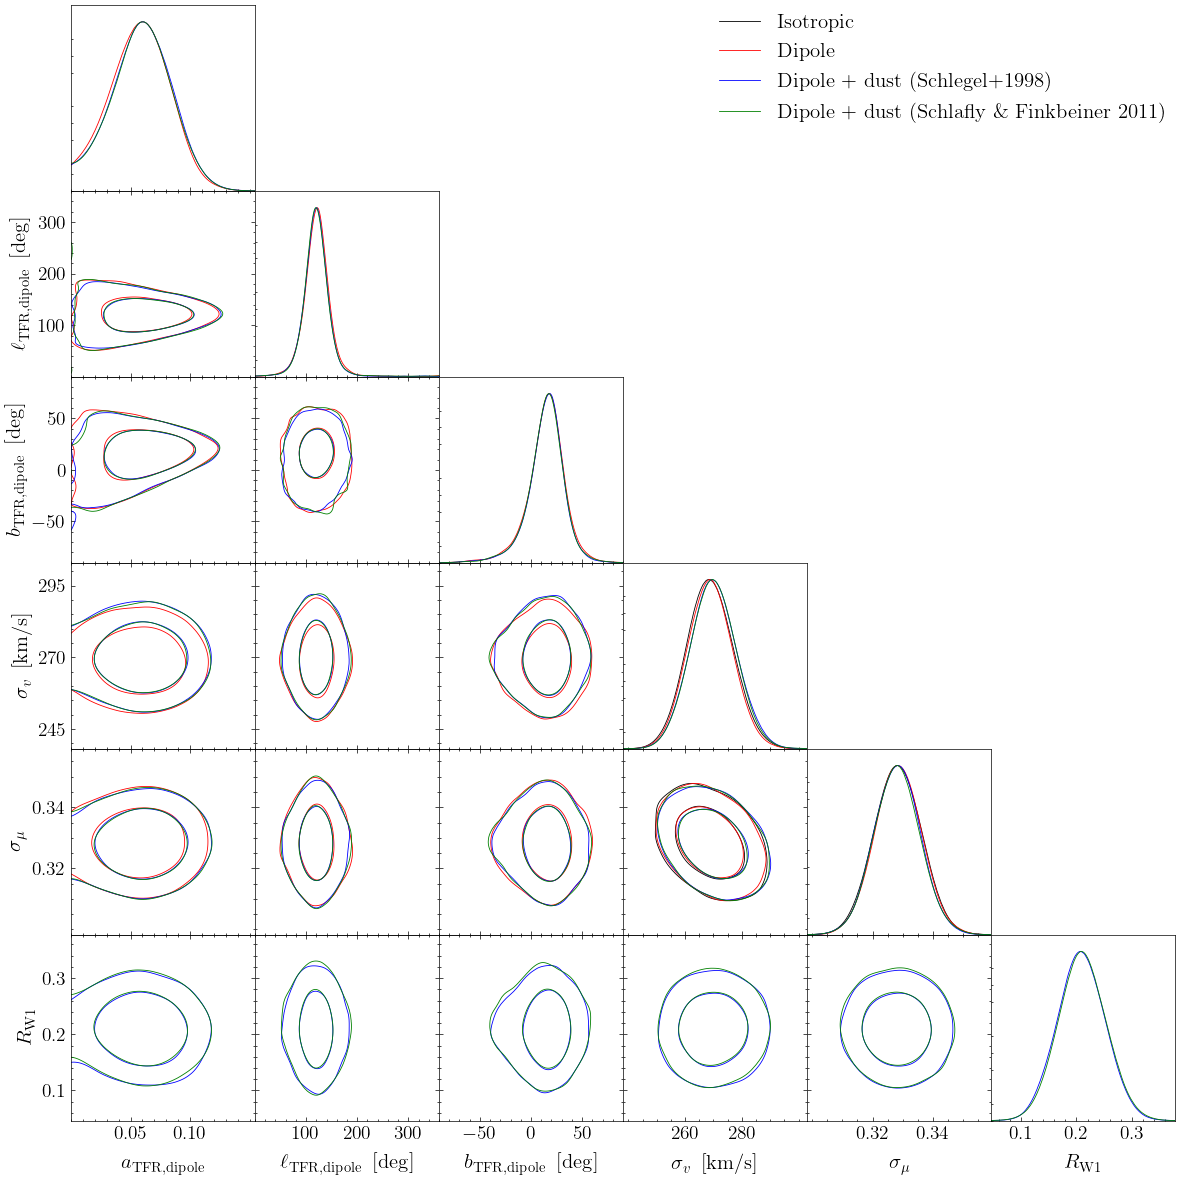

In [19]:
fnames = [
    # "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5",
    ]

labels = [
    # "Isotropic MNR",
    "Isotropic",
    "Dipole",
    "Dipole + dust (Schlegel+1998)",
    "Dipole + dust (Schlafly \& Finkbeiner 2011)",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=18,
    filled=False,
    labels=labels,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b", "sigma_v", "sigma_mu", "R_dust"],
    filename="C15_mag_dipole.pdf",
    )

### Figure: CF4 dipole but without PV corrections

Vext_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b_TFR, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
Removed no burn in
2025-05-26 13:31:08 [INFO] Saving GetDist triangle plot to: C15_CF4_no_PV.pdf


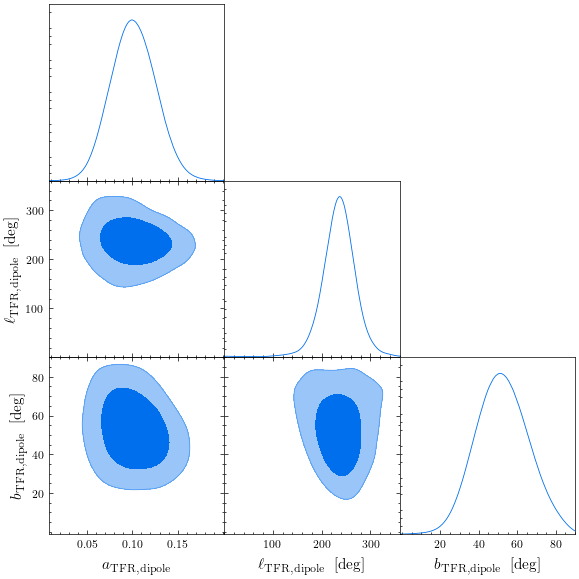

In [8]:
fnames = [
    "Vext_CF4_W1_MNR_aTFRdipole.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    # fontsize=22,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b",],
    filename="C15_CF4_no_PV.pdf",
    )

### Figure: Pantheon+ dipole

In [ ]:
fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5"


keys = ["M_dipole_mag", "M_dipole_ell", "M_dipole_b", ]
plot_corner_from_hdf5(fname, keys=keys, filename="Pantheon+_dipole.pdf", )

### Figure: Evidence as a function of the sample size

In [20]:
mock_dir = "/Users/rstiskalek/Projects/CANDEL/results/mock_CF4_H0_anisotropy"

records = np.loadtxt("/Users/rstiskalek/Projects/CANDEL/data/CF4_mock/mock_index.txt", dtype=int, comments='#')
indices, nsamples = records[:, 0], records[:, 1]

fnames = [join(mock_dir, f"precomputed_los_Carrick2015_CF4_mock_{i}_noMNR_aTFRdipole.hdf5")
          for i in indices]


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_74178/2261655444.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


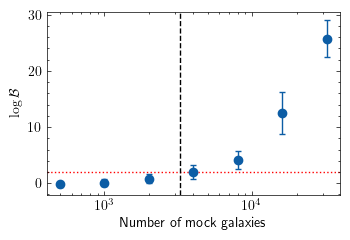

In [28]:
metric = "logZ_harmonic"
with plt.style.context("science"):
    fig, ax = plt.subplots(1, 1, figsize=(3.6, 2.5))
    lw = plt.rcParams["lines.linewidth"]
    unique_ns = np.unique(nsamples)

    means = []
    stds = []
    xticks = []

    gof = [
        compare_zeropoint_dipole_gof(fname, metric, verbose=False)
        for fname in fnames
    ]
    gof = np.asarray(gof)

    for num_samples in unique_ns:
        mask = nsamples == num_samples
        gof_vals = gof[mask]

        if np.sum(np.isfinite(gof_vals)) == 0:
            continue

        mean = np.nanmean(gof_vals)
        std = np.nanstd(gof_vals)
        means.append(mean)
        stds.append(std)
        xticks.append(num_samples)

    ax.errorbar(
        xticks, means, yerr=stds,
        fmt='o', capsize=2, elinewidth=lw, linewidth=lw
    )

    ax.set_xlabel("Number of mock galaxies")
    ax.set_ylabel(r"$\log \mathcal{B}$")
    ax.axhline(2, color="red", linestyle="dotted", lw=lw, zorder=0)

    ax.set_xscale("log")

    if 3250 > min(xticks) and 3250 < max(xticks):
        x_idx = np.interp(3250, xticks, np.arange(len(xticks)))
        ax.axvline(x=3250, c="k", linestyle="dashed", lw=lw, zorder=0)

    fig.tight_layout()
    fig.savefig("evidence_comparison.pdf", dpi=450)
    fig.show()

### Playground

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    keys=["Vext_mag", "Vext_ell", "Vext_b"],
    )